In [1]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import folium.plugins as plugins

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("Data-Collisions.csv")

In [4]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
data.head(20)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [6]:
data['SEVERITYCODE'].equals(data[ 'SEVERITYCODE.1'])

True

In [7]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [8]:
data['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [9]:
data['X'].fillna(data['X'].mean(), inplace = True)
data['Y'].fillna(data['Y'].mean(), inplace = True)

In [10]:
seattle_map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(seattle_map)
incidents = plugins.MarkerCluster().add_to(seattle_map)
data1 = data[:3000]

for lat, lng in zip(data1.Y, data1.X):
    folium.Marker(location = [lat, lng],
                 icon = None).add_to(incidents)
seattle_map

In [11]:
data_columns = ['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']

In [12]:
print(data.WEATHER.isna().sum())
data.WEATHER.value_counts().to_frame()

5081


,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [13]:
print(data.STATUS.isna().sum())
data.STATUS.value_counts().to_frame()    ##Drop this no information was available regarding this variable in metadata sheet.

0


,STATUS
Matched,189786
Unmatched,4887


In [14]:
print(data.COLLISIONTYPE.isna().sum())
data.COLLISIONTYPE.value_counts().to_frame()  ## Drop this, not relevent how the collision happened

4904


,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [15]:
print(data['PERSONCOUNT'].isna().sum())
print(data['PERSONCOUNT'].value_counts().to_frame().head())
data['PERSONCOUNT'].describe()

0
   PERSONCOUNT
2       114231
3        35553
4        14660
1        13154
5         6584


count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [16]:
print(data['PEDCOUNT'].describe())
data['PEDCOUNT'].value_counts()          ## Drop this as most of the values are 0.

count    194673.000000
mean          0.037139
std           0.198150
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64


0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [17]:
data['VEHCOUNT'].describe()

count    194673.000000
mean          1.920780
std           0.631047
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: VEHCOUNT, dtype: float64

In [18]:
data['INATTENTIONIND'].value_counts()   ##drop it

Y    29805
Name: INATTENTIONIND, dtype: int64

In [19]:
data['UNDERINFL'].value_counts().to_frame() ##Replace or map the values to integers 0 and 1

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


In [20]:
data['JUNCTIONTYPE'].value_counts().to_frame()   #drop it 

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [21]:
data['SPEEDING'].value_counts().to_frame()  ## Fill na with "N" ot 0 and replace Y with 1 (Integer)

,SPEEDING
Y,9333


In [22]:
print(data['ROADCOND'].value_counts().to_frame())
data['ROADCOND'].isna().sum()                      ## fillna with 

                ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64


5012

In [23]:
print(data['LIGHTCOND'].value_counts().to_frame())
data['LIGHTCOND'].isna().sum()                      ## fillna with 

                          LIGHTCOND
Daylight                     116137
Dark - Street Lights On       48507
Unknown                       13473
Dusk                           5902
Dawn                           2502
Dark - No Street Lights        1537
Dark - Street Lights Off       1199
Other                           235
Dark - Unknown Lighting          11


5170

In [24]:
data['HITPARKEDCAR'].value_counts().to_frame()    ## Drop it as most of the values are N

,HITPARKEDCAR
N,187457
Y,7216


In [25]:
data['INCDTTM'].value_counts().to_frame()   ## Drop the incdate column as it is redundant

,INCDTTM
11/2/2006,96
10/3/2008,91
11/5/2005,83
12/4/2004,74
6/1/2006,73
...,...
9/13/2015 11:20:00 PM,1
11/12/2007 12:58:00 PM,1
3/1/2014 2:26:00 AM,1
11/29/2005 12:20:00 PM,1


In [26]:
df = data[['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','INCDTTM',
           'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [27]:
#df['DAY'] =pd.DatetimeIndex(df['INCDTTM']).day
#df['MONTH'] = pd.DatetimeIndex(df['INCDTTM']).month
#df['YEAR'] = pd.DatetimeIndex(df['INCDTTM']).year
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [28]:
def extract_road_cond(dataset):
    """This function fills the ROADCOND columns with the 
        appropiate vlaue with respect to weather.
        
        Input Parameter: This function has single input parameter 
        that is the dataframe itself.
        
        Returns : This function returs the modified dataframe.
        
        """
    for index, row in dataset.iterrows():
        if dataset.loc[index, 'WEATHER'] == 'Raining':
            dataset['ROADCOND'] = dataset['ROADCOND'].fillna('Wet') 
        else:
            dataset['ROADCOND'] = dataset['ROADCOND'].fillna('Dry') 
        return dataset
#df = extract_road_cond(df)
#df.info()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SEVERITYCODE  194673 non-null  int64         
 1   X             194673 non-null  float64       
 2   Y             194673 non-null  float64       
 3   PERSONCOUNT   194673 non-null  int64         
 4   PEDCOUNT      194673 non-null  int64         
 5   PEDCYLCOUNT   194673 non-null  int64         
 6   VEHCOUNT      194673 non-null  int64         
 7   INCDTTM       194673 non-null  datetime64[ns]
 8   UNDERINFL     189789 non-null  object        
 9   WEATHER       189592 non-null  object        
 10  ROADCOND      189661 non-null  object        
 11  LIGHTCOND     189503 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 17.8+ MB


In [30]:
df.replace('Unknown', np.nan, inplace=True)
df.replace('Other', np.nan, inplace=True)

In [31]:
df['SPEEDING'] = data['SPEEDING']
df['SPEEDING'].replace('Y', 1, inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,185340
1.0,9333


In [32]:
df.dropna(axis=0, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169957 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SEVERITYCODE  169957 non-null  int64         
 1   X             169957 non-null  float64       
 2   Y             169957 non-null  float64       
 3   PERSONCOUNT   169957 non-null  int64         
 4   PEDCOUNT      169957 non-null  int64         
 5   PEDCYLCOUNT   169957 non-null  int64         
 6   VEHCOUNT      169957 non-null  int64         
 7   INCDTTM       169957 non-null  datetime64[ns]
 8   UNDERINFL     169957 non-null  object        
 9   WEATHER       169957 non-null  object        
 10  ROADCOND      169957 non-null  object        
 11  LIGHTCOND     169957 non-null  object        
 12  SPEEDING      169957 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 18.2+ MB


In [34]:
df.reset_index(inplace = True)

Text(0.5, 1.0, 'Accidents over the years')

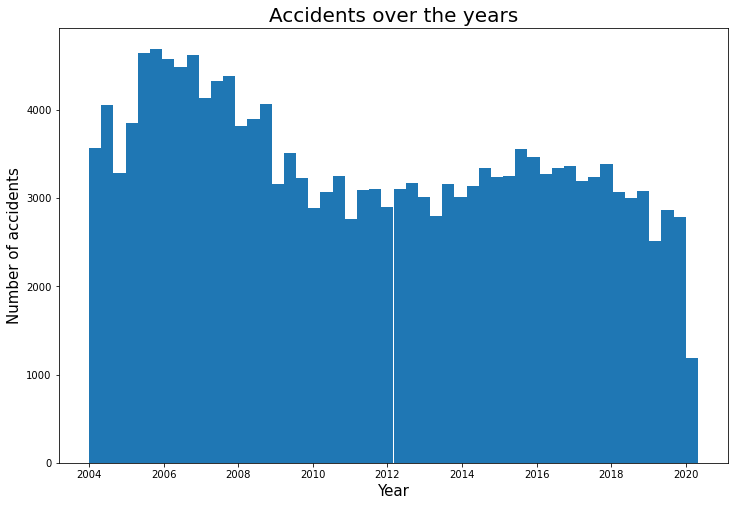

In [35]:
plt.figure(figsize= (12,8))
plt.hist(df['INCDTTM'], bins = 50)
plt.xlabel("Year", size = 15)
plt.ylabel("Number of accidents", size= 15)
plt.title("Accidents over the years", size = 20)

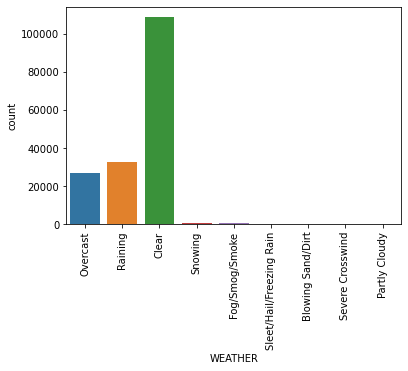

In [36]:
import seaborn as sns 
ax = sns.countplot(df['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

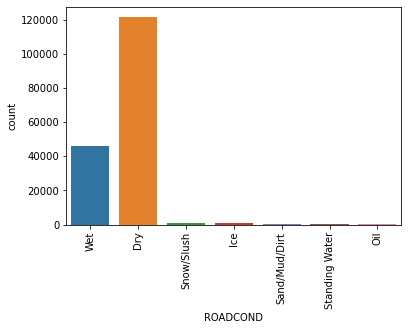

In [37]:
ax = sns.countplot(df['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

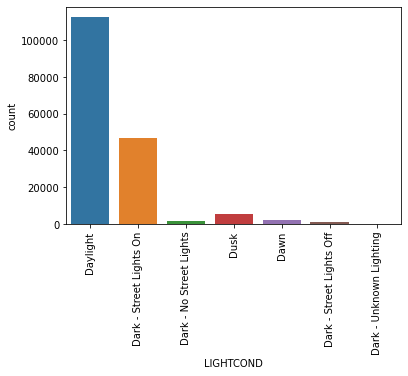

In [38]:
ax = sns.countplot(df['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

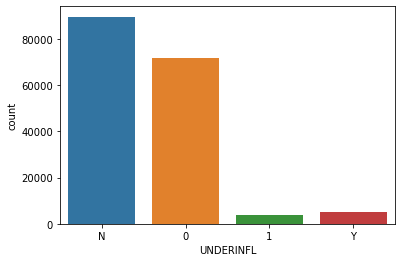

In [39]:
sns.countplot(df['UNDERINFL'])

In [40]:
df['UNDERINFL'] = df['UNDERINFL'].replace("Y", 1).replace("1", 1).replace("N", 0).replace("0", 0)

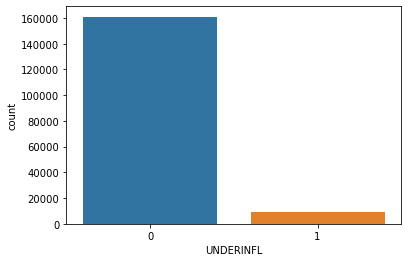

In [41]:
sns.countplot(df['UNDERINFL'])

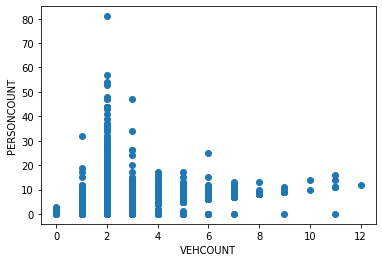

In [42]:
ax = plt.scatter(df['VEHCOUNT'], df['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')


plt.ylabel('PERSONCOUNT')
plt.show()

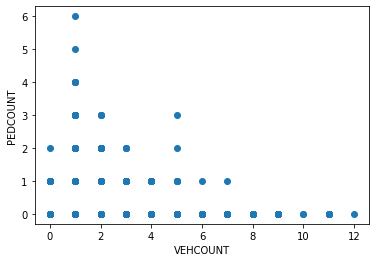

In [43]:
ax = plt.scatter(df['VEHCOUNT'], df['PEDCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PEDCOUNT')
plt.show()

In [44]:
cmap_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
               'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
               'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
               'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
               'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
               'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
               'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
               'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
               'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
               'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
               'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
               'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 
               'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 
               'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
               'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
               'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
               'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
               'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

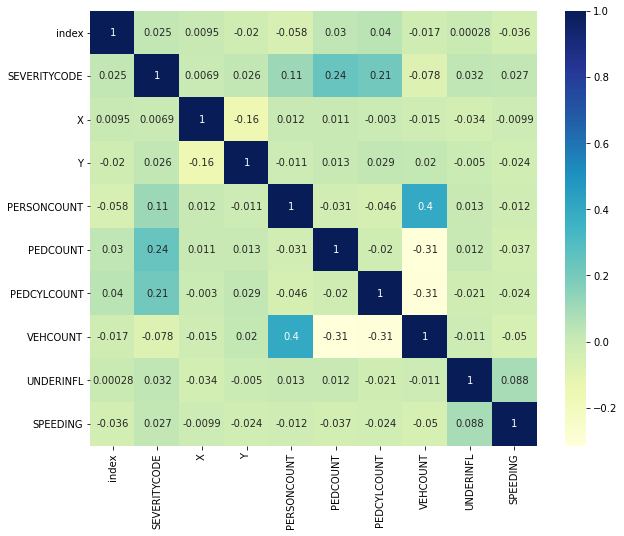

In [45]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [46]:
dummies_encoding = pd.get_dummies(df[['ROADCOND', 'WEATHER', 'LIGHTCOND']])
dummies_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169957 entries, 0 to 169956
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   ROADCOND_Dry                        169957 non-null  uint8
 1   ROADCOND_Ice                        169957 non-null  uint8
 2   ROADCOND_Oil                        169957 non-null  uint8
 3   ROADCOND_Sand/Mud/Dirt              169957 non-null  uint8
 4   ROADCOND_Snow/Slush                 169957 non-null  uint8
 5   ROADCOND_Standing Water             169957 non-null  uint8
 6   ROADCOND_Wet                        169957 non-null  uint8
 7   WEATHER_Blowing Sand/Dirt           169957 non-null  uint8
 8   WEATHER_Clear                       169957 non-null  uint8
 9   WEATHER_Fog/Smog/Smoke              169957 non-null  uint8
 10  WEATHER_Overcast                    169957 non-null  uint8
 11  WEATHER_Partly Cloudy               169957 non-null 

In [47]:
df = pd.concat([df, dummies_encoding], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169957 entries, 0 to 169956
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   index                               169957 non-null  int64         
 1   SEVERITYCODE                        169957 non-null  int64         
 2   X                                   169957 non-null  float64       
 3   Y                                   169957 non-null  float64       
 4   PERSONCOUNT                         169957 non-null  int64         
 5   PEDCOUNT                            169957 non-null  int64         
 6   PEDCYLCOUNT                         169957 non-null  int64         
 7   VEHCOUNT                            169957 non-null  int64         
 8   INCDTTM                             169957 non-null  datetime64[ns]
 9   UNDERINFL                           169957 non-null  int64         
 10  WEATHER 

In [48]:
df.drop(['ROADCOND', 'WEATHER', 'LIGHTCOND'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169957 entries, 0 to 169956
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   index                               169957 non-null  int64         
 1   SEVERITYCODE                        169957 non-null  int64         
 2   X                                   169957 non-null  float64       
 3   Y                                   169957 non-null  float64       
 4   PERSONCOUNT                         169957 non-null  int64         
 5   PEDCOUNT                            169957 non-null  int64         
 6   PEDCYLCOUNT                         169957 non-null  int64         
 7   VEHCOUNT                            169957 non-null  int64         
 8   INCDTTM                             169957 non-null  datetime64[ns]
 9   UNDERINFL                           169957 non-null  int64         
 10  SPEEDING

In [49]:
df.sample(frac = 1).reset_index(drop = True)

,index,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,...,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,51604,1,-122.315388,47.662196,2,0,0,2,2007-04-07 00:00:00,0,...,0,0,0,0,0,0,0,0,1,0
1,54102,2,-122.356739,47.620941,2,0,0,2,2007-08-13 06:48:00,0,...,0,0,0,0,0,0,0,0,1,0
2,56106,1,-122.316119,47.546400,2,0,0,2,2007-10-10 18:30:00,0,...,0,0,0,0,0,0,0,0,1,0
3,61862,1,-122.353475,47.620929,2,0,0,2,2008-08-28 08:45:00,0,...,0,0,0,0,0,0,0,0,1,0
4,115600,2,-122.349488,47.645710,3,0,1,1,2013-01-23 17:05:00,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169952,38793,2,-122.325975,47.582936,5,0,0,2,2006-04-15 13:14:00,0,...,0,0,0,0,0,0,0,0,1,0
169953,12230,2,-122.349177,47.614362,4,0,0,2,2004-08-22 22:22:00,0,...,0,0,0,0,0,1,0,0,0,0
169954,47292,2,-122.304848,47.587151,3,0,0,2,2007-10-21 10:31:00,0,...,0,0,0,0,0,0,0,0,1,0
169955,17749,2,-122.294211,47.615276,3,0,0,2,2005-09-25 13:48:00,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
df.drop(['INCDTTM'], axis = 1, inplace = True)

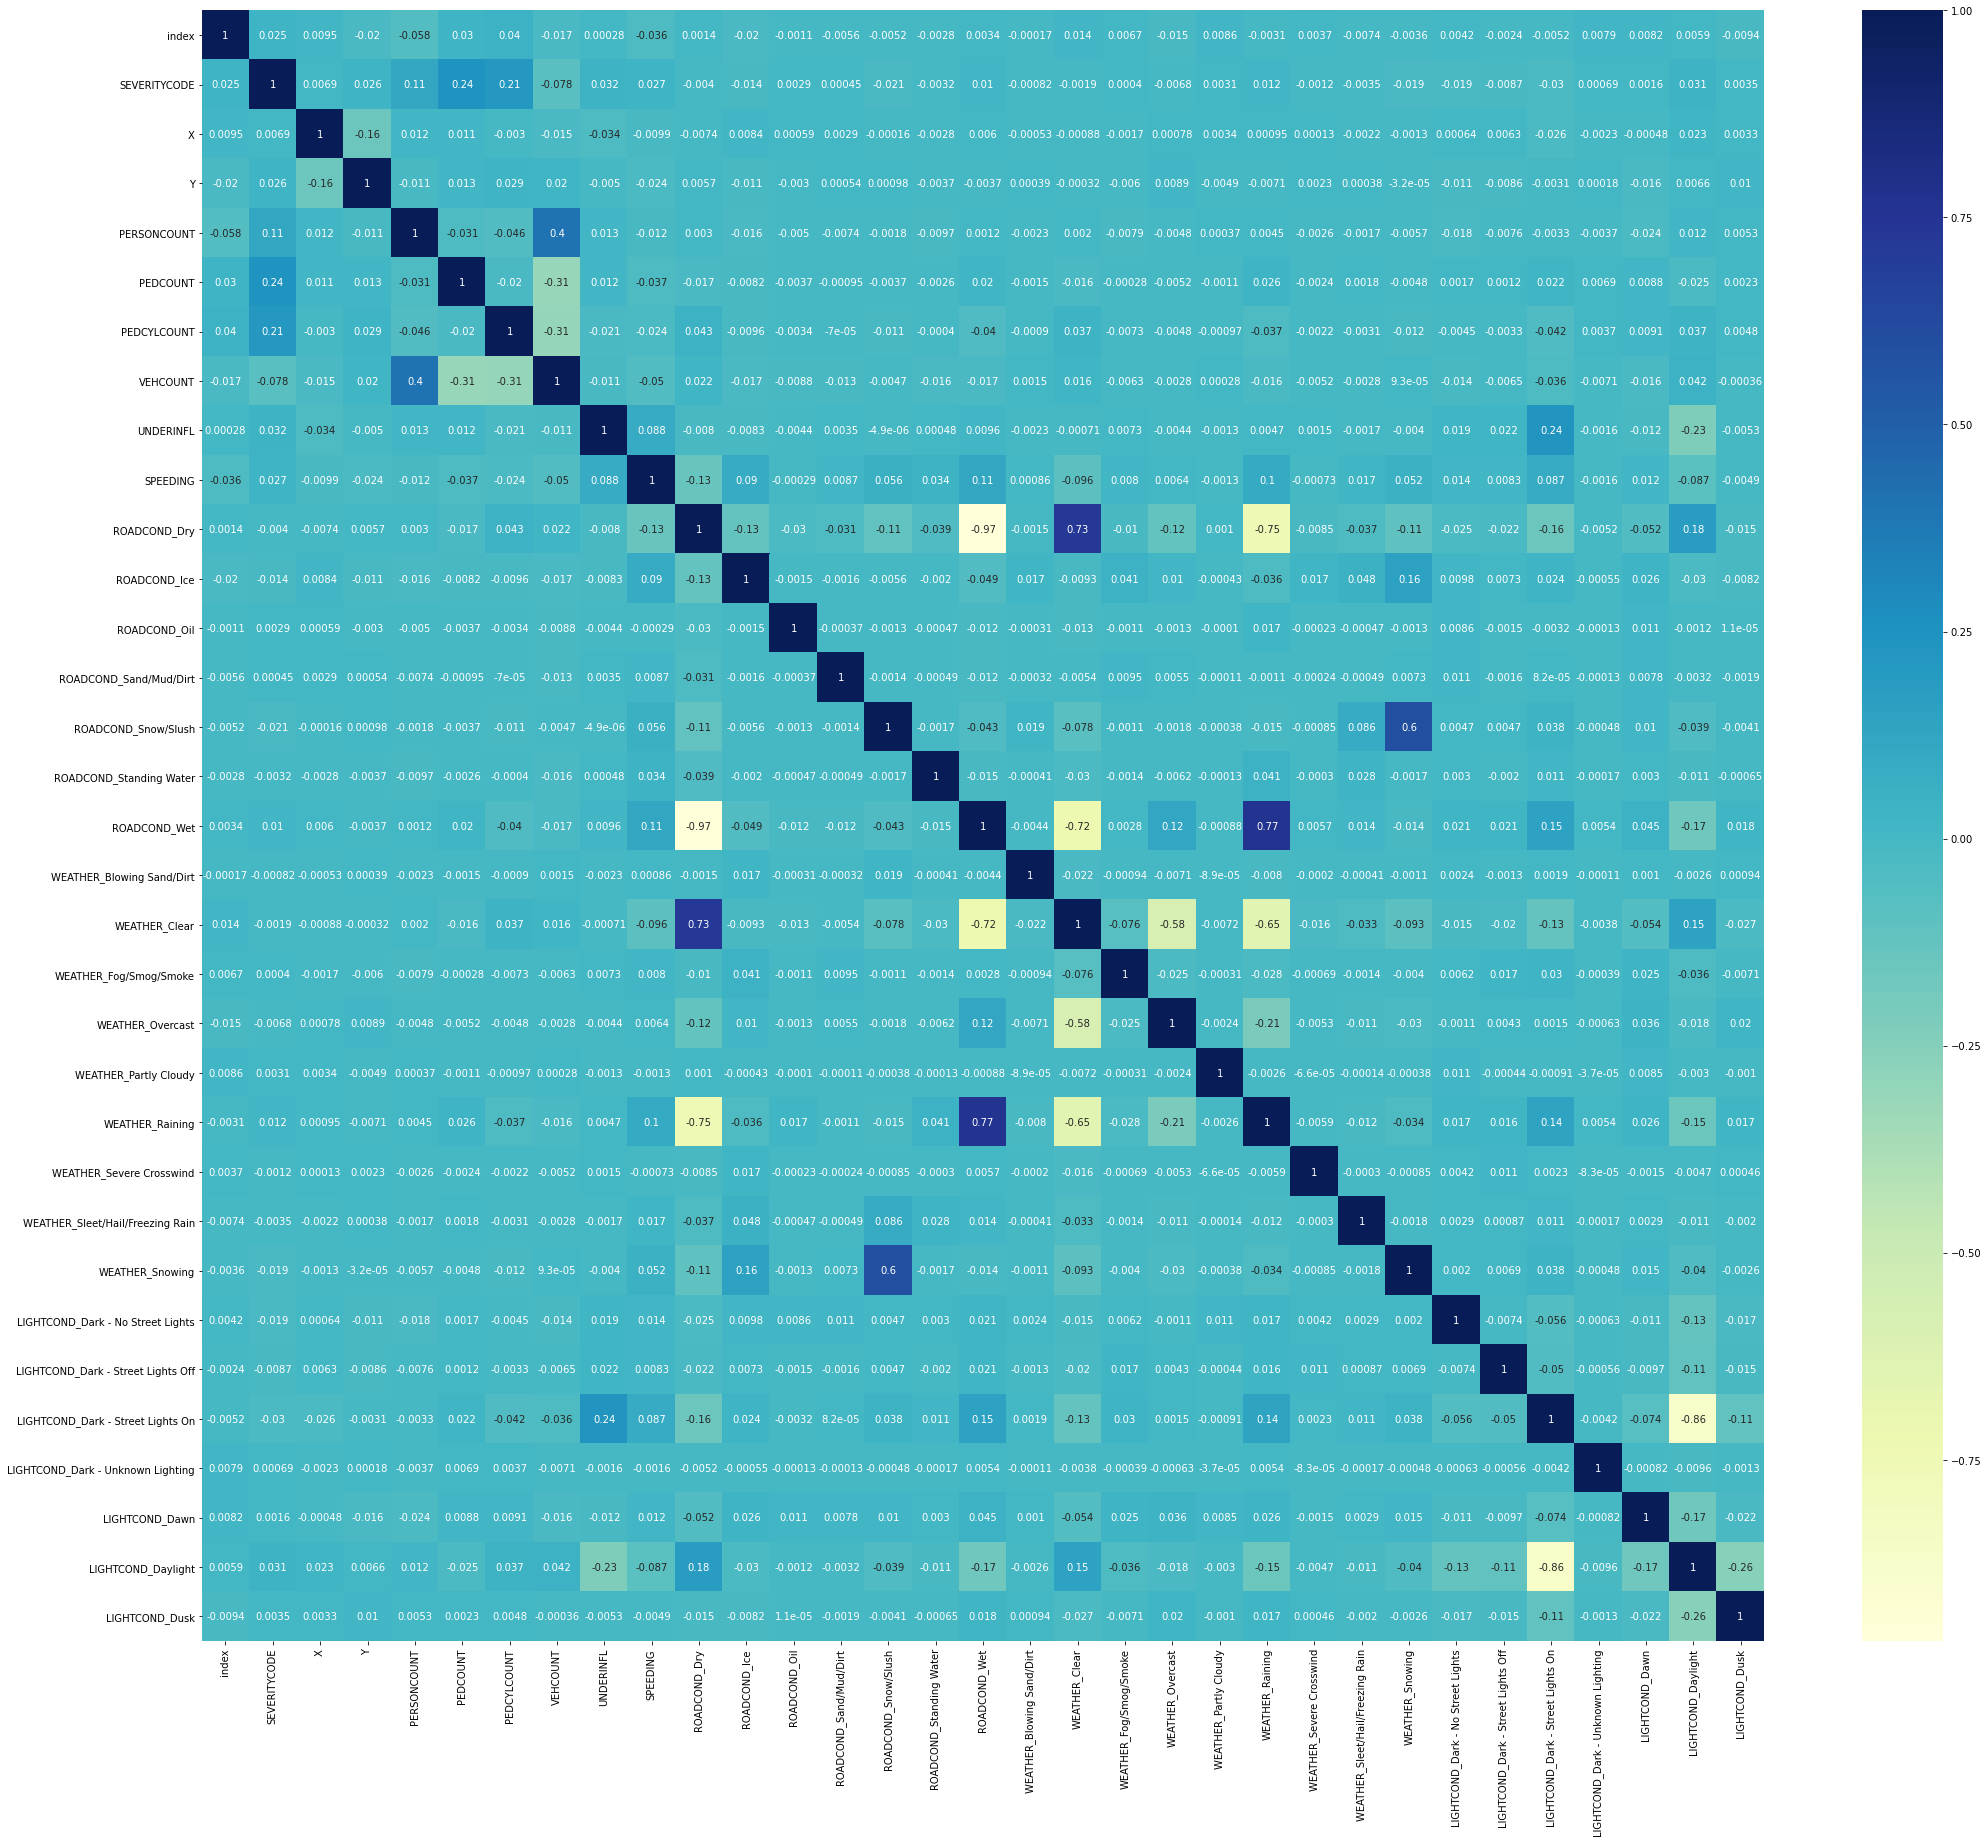

In [51]:
plt.figure(figsize = (35,30))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.savefig("Correlation.png")
plt.show()

In [52]:
y = df[['SEVERITYCODE']]
x = df.drop(['SEVERITYCODE'], axis = 1)


In [53]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(x)

scaled_df[:2]

array([[-1.70044942,  0.24398985,  1.5021401 , -0.35811011, -0.19657919,
        -0.17859303,  0.05158027, -0.23618714, -0.23764147, -1.58324162,
        -0.07996991, -0.01879242, -0.01956006, -0.07018105, -0.02486333,
         1.63366941, -0.01645387, -1.33422795, -0.0571348 ,  2.30493093,
        -0.00542403, -0.48761694, -0.01212921, -0.02509916, -0.06984158,
        -0.09139833, -0.08122712, -0.61597105, -0.00686097, -0.12000911,
         0.71354465, -0.18540296],
       [-1.70043174, -0.57498373,  0.50348505, -0.35811011, -0.19657919,
        -0.17859303,  0.05158027, -0.23618714, -0.23764147, -1.58324162,
        -0.07996991, -0.01879242, -0.01956006, -0.07018105, -0.02486333,
         1.63366941, -0.01645387, -1.33422795, -0.0571348 , -0.43385248,
        -0.00542403,  2.0507901 , -0.01212921, -0.02509916, -0.06984158,
        -0.09139833, -0.08122712,  1.62345292, -0.00686097, -0.12000911,
        -1.401454  , -0.18540296]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.2, random_state = 42)

In [76]:
lr = LogisticRegression(C= 0.01)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.72      0.98      0.83     22809
           2       0.82      0.21      0.34     11183

    accuracy                           0.73     33992
   macro avg       0.77      0.60      0.58     33992
weighted avg       0.75      0.73      0.67     33992



In [78]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.87      0.80     22809
           2       0.57      0.35      0.43     11183

    accuracy                           0.70     33992
   macro avg       0.65      0.61      0.61     33992
weighted avg       0.68      0.70      0.68     33992



In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
lr_probs = lr.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)

In [82]:
lr_probs = lr_probs[:, 1]
rfc_probs = rfc_probs[:, 1]

In [83]:
lr_auc = roc_auc_score(y_test, lr_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)

In [84]:
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))

Logistic: ROC AUC=0.678
Random Forest: ROC AUC=0.672


In [85]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label = 1)    #The label of the positive class. When pos_label=None, 
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs, pos_label = 1) #if y_true is in {-1, 1} or {0, 1}, pos_label is set to 1,
                                                                #otherwise an error will be raised. Here class label are {1 ,2}                  

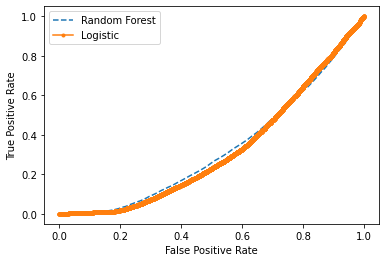

In [86]:
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [91]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs, pos_label = 1)
lr_f1, lr_auc = f1_score(y_test, y_pred_lr), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.827 auc=0.547


In [92]:
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs, pos_label = 1)
rfc_f1, rfc_auc = f1_score(y_test, y_pred), auc(rfc_recall, rfc_precision)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))

Random Forest: f1=0.796 auc=0.552
